# 1.나의 첫 머신러닝

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

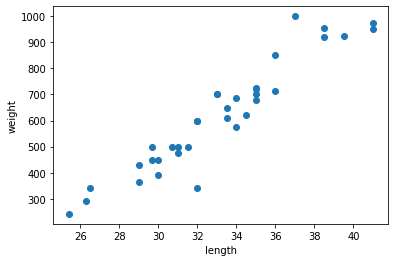

In [ ]:
import matplotlib.pyplot as plt

# 도미 데이터
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

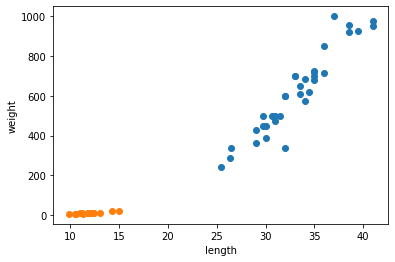

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# K-Nearest Neighbors Algorithm
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# [[l,w], [l,w], [l,w] ...] make 2d matrix format
fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 찾는 대상 : 1, 다른 대상 : 0
fish_target = [1] * 35 + [0] * 14  # 도미:1, 빙어:0
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# fit(학습시킬 데이터, 정답 데이터)
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 정확도
kn.score(fish_data, fish_target)

# 학습 모델을 기반으로 새로운 데이터 분류
kn.predict([[30,600]])

1.0

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49 모델

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  # k-최근접 이웃 개수 설정
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)

  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


# 2. 훈련 세트와 테스트 세트


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0] *14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 샘플링 편향으로 인해 정확도 0

0.0

In [ ]:
import numpy as np

# 파이썬 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr.shape) # (샘플 수, 특성의 수) 출력

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

(49, 2)
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


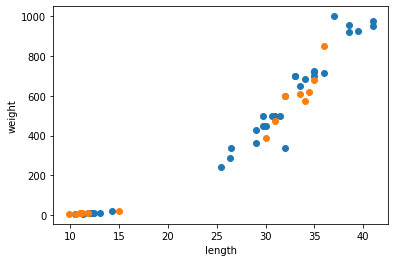

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
print(test_input)
print(test_target )

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 데이터 전처리

In [ ]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split
# 25%를 테스트데이터로 분리해줌, 순서도 섞어줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
# stratify=fish_target : 샘플링 편향을 막기 위해 샘플을 골고루 섞어주는 옵션
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


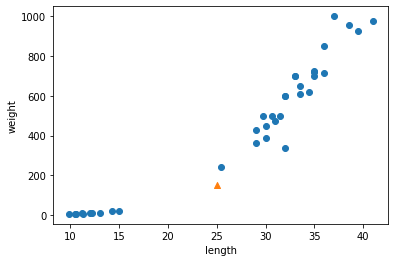

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수로 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

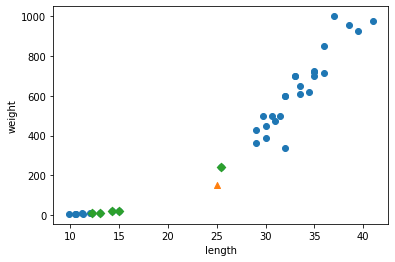

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수로 모양 지정
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


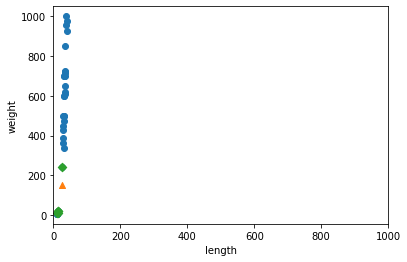

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수로 모양 지정
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축과 y축의 비율을 동일하게  맞춰줌(스케일)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 전처리 방법(1) :  표준 점수
각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지 나타냄

In [ ]:
mean = np.mean(train_input, axis=0) # 평균 계산
std = np.std(train_input, axis=0)  # 표준편차 계산
# axis=0 일 경우 행을 따라 각 열의  통계값 계산
print(mean, std)

train_scaled = (train_input - mean) / std # 브로드 캐스팅으로 각 행에서 mean(평균)을  뺀 뒤 std(표준편차)로 나누어줌
print(train_scaled)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

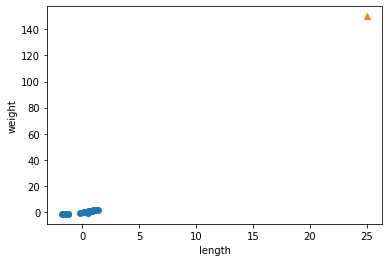

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^') # marker 매개변수로 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

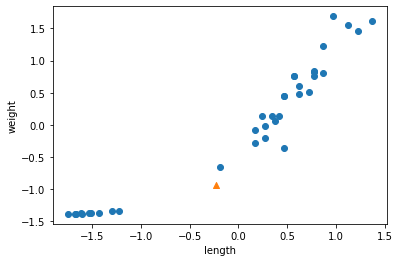

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^') # marker 매개변수로 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std 
kn.score(test_scaled, test_target)
print(kn.predict([new]))

[1.]


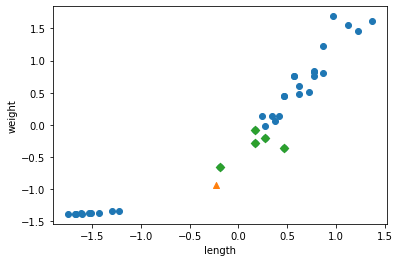

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^') # marker 매개변수로 모양 지정
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()